<a href="https://colab.research.google.com/github/saurabh0431481-spec/zomato.project/blob/main/zomato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
df = pd.read_csv('/content/Indian-Resturants (3).csv')

 **Data Overview:**

 Explore the basic characteristics of the dataset, including dimensions, data
 types, and missing values.

In [8]:
df.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

In [12]:

print((df.isnull().sum()/df.shape[0])*100)
df['zipcode'].fillna(df['zipcode'].mode()[0], inplace=True)
df.dropna(inplace=True)

res_id                  0.0
name                    0.0
establishment           0.0
url                     0.0
address                 0.0
city                    0.0
city_id                 0.0
locality                0.0
latitude                0.0
longitude               0.0
zipcode                 0.0
country_id              0.0
locality_verbose        0.0
cuisines                0.0
timings                 0.0
average_cost_for_two    0.0
price_range             0.0
currency                0.0
highlights              0.0
aggregate_rating        0.0
rating_text             0.0
votes                   0.0
photo_count             0.0
opentable_support       0.0
delivery                0.0
takeaway                0.0
dtype: float64


/tmp/ipython-input-1224272946.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['zipcode'].fillna(df['zipcode'].mode()[0], inplace=True)


<Axes: >

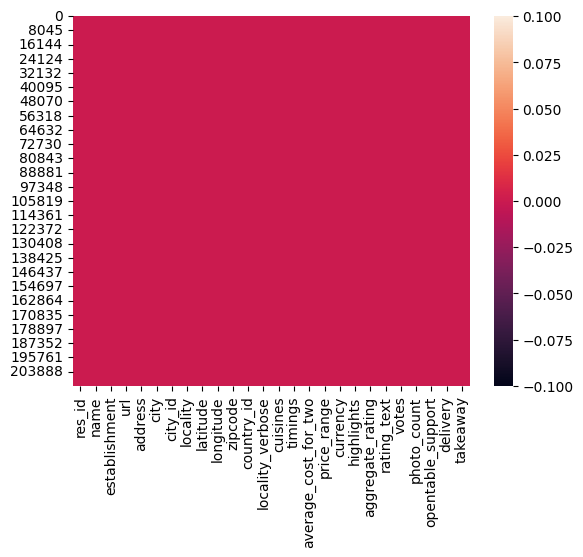

In [11]:
sns.heatmap(df.isnull())

In [13]:
df.describe()

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,2.070210e+05,207021.000000,207021.000000,207021.000000,207021.0,207021.000000,207021.000000,207021.000000,207021.000000,207021.000000,207021.0,207021.000000,207021.0
mean,1.337761e+07,4640.061762,21.485940,77.612413,1.0,603.767768,1.896696,3.431203,386.434883,262.830466,0.0,-0.251743,-1.0
std,7.928959e+06,5549.972214,23.025185,7.411938,0.0,610.022547,0.894505,1.247813,934.565266,877.039972,0.0,0.965370,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,-18.000000,0.000000,0.0,-1.000000,-1.0
25%,3.202169e+06,11.000000,15.493801,74.878378,1.0,250.000000,1.000000,3.300000,18.000000,4.000000,0.0,-1.000000,-1.0
50%,1.869425e+07,33.000000,22.523532,77.402449,1.0,400.000000,2.000000,3.800000,107.000000,19.000000,0.0,-1.000000,-1.0
75%,1.880546e+07,11304.000000,26.835986,80.219323,1.0,700.000000,2.000000,4.100000,374.000000,134.000000,0.0,1.000000,-1.0
max,1.915979e+07,11354.000000,10000.000000,91.832769,1.0,30000.000000,4.000000,4.900000,42539.000000,17702.000000,0.0,1.000000,-1.0


Average rating of restaurants: 3.4312031146598647


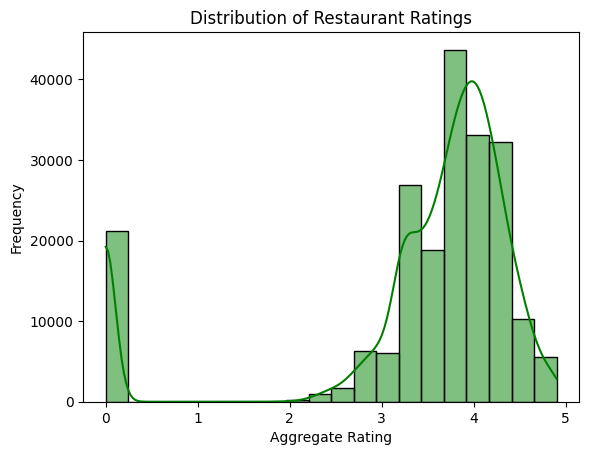

In [14]:
Avg_rating = df['aggregate_rating'].mean()
print('Average rating of restaurants:', Avg_rating)
sns.histplot(df['aggregate_rating'], kde=True, bins=20, color='green')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Restaurant Ratings')
plt.show()

 **Location Analysis:**


city
Agra          3.510274
Ahmedabad     3.815706
Ajmer         3.581988
Alappuzha     0.858842
Allahabad     3.495074
                ...   
Varanasi      3.670771
Vellore       3.047334
Vijayawada    3.624036
Vizag         3.649402
Zirakpur      3.249219
Name: aggregate_rating, Length: 99, dtype: float64


/tmp/ipython-input-137706398.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_rating.head(5).index, y=city_rating.head(5).values, palette='viridis')


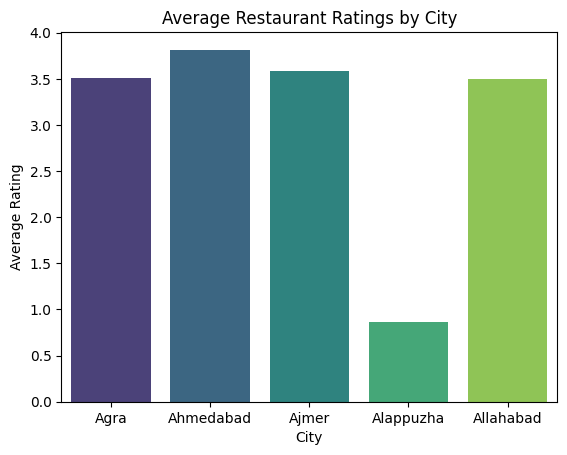

In [15]:
city_rating = df.groupby('city')['aggregate_rating'].mean()
print(city_rating)
sns.barplot(x=city_rating.head(5).index, y=city_rating.head(5).values, palette='viridis')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.title('Average Restaurant Ratings by City')
plt.show()


**Cuisine Analysis:**


cuisines
North Indian             15610
Fast Food                 6544
Cafe                      6122
North Indian, Chinese     5742
South Indian              5082
Name: name, dtype: int64
                  num_cuisines  aggregate_rating
num_cuisines          1.000000          0.229888
aggregate_rating      0.229888          1.000000


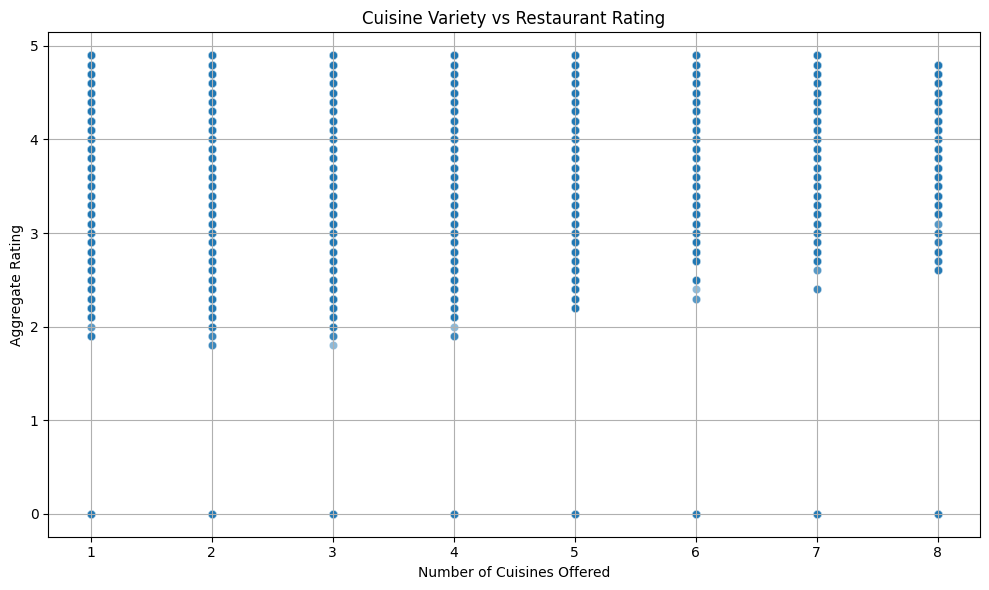

In [16]:
# Determine the most popular cuisines among the listed restaurants.
populer_cuisines = df.groupby('cuisines')['name'].count().sort_values(ascending=False).head(5)
print(populer_cuisines)
# Investigate if there's a correlation between the variety of cuisines offered and restaurant rating
# Create a new column: number of cuisines offered by each restaurant
df['num_cuisines'] = df['cuisines'].dropna().apply(lambda x: len(x.split(', ')))
correlation = df[['num_cuisines', 'aggregate_rating']].corr()
print(correlation)


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='num_cuisines', y='aggregate_rating', alpha=0.5)

plt.title('Cuisine Variety vs Restaurant Rating')
plt.xlabel('Number of Cuisines Offered')
plt.ylabel('Aggregate Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

**Price Range and Rating:**

                  price_range  aggregate_rating
price_range          1.000000          0.243326
aggregate_rating     0.243326          1.000000
price_range
1     228.305484
2     516.499141
3    1088.978985
4    2217.549693
Name: average_cost_for_two, dtype: float64


/tmp/ipython-input-1039214221.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_cost.index, y=price_cost.values, palette='viridis')


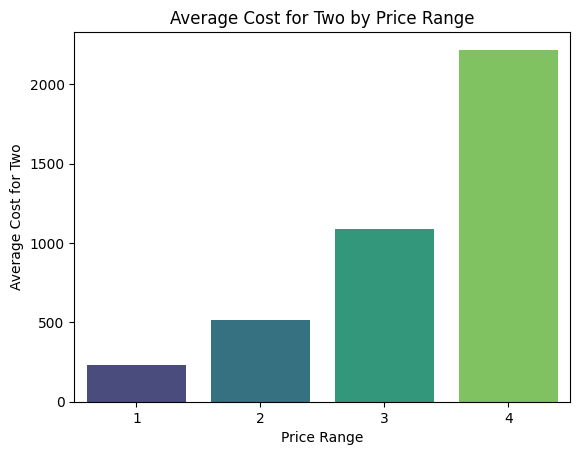

In [17]:
#  Analyze the relationship between price range and restaurant ratings.
correlation = df[['price_range', 'aggregate_rating']].corr()
print(correlation)

# Visualize the average cost for two people in different price categories.
price_cost = df.groupby('price_range')['average_cost_for_two'].mean()
print(price_cost)
sns.barplot(x=price_cost.index, y=price_cost.values, palette='viridis')
plt.xlabel('Price Range')
plt.ylabel('Average Cost for Two')
plt.title('Average Cost for Two by Price Range')
plt.show()


**Online Order and Table Booking:**

delivery
-1    3.242618
 0    3.405046
 1    3.747814
Name: aggregate_rating, dtype: float64


/tmp/ipython-input-2042736367.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='delivery', y='aggregate_rating', palette='viridis')


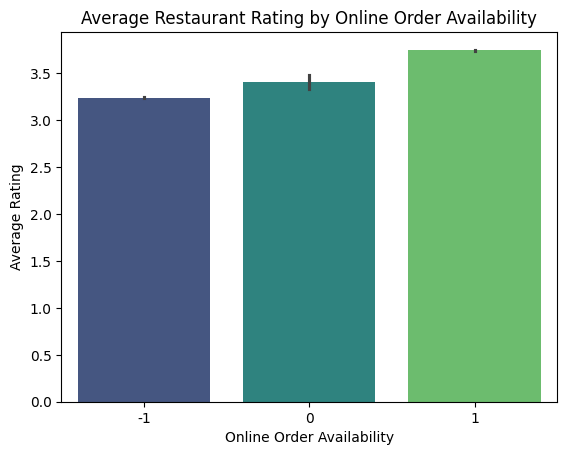

opentable_support
0.0    207021
Name: name, dtype: int64


In [18]:
#  Investigate the impact of online order availability on restaurant ratings.
order_rating = df.groupby('delivery')['aggregate_rating'].mean()
print(order_rating)
sns.barplot(data=df, x='delivery', y='aggregate_rating', palette='viridis')
plt.xlabel('Online Order Availability')
plt.ylabel('Average Rating')
plt.title('Average Restaurant Rating by Online Order Availability')
plt.show()

# Analyze the distribution of restaurants that offer table booking.
table_booking_counts = df.groupby('opentable_support')['name'].count()
print(table_booking_counts)

**Top Restaurant Chains:**

name
Domino's Pizza     3108
KFC                1331
Cafe Coffee Day    1040
Pizza Hut           936
Subway              766
Name: count, dtype: int64


/tmp/ipython-input-34729084.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_chains.index, y=top_chains.values, palette='viridis')


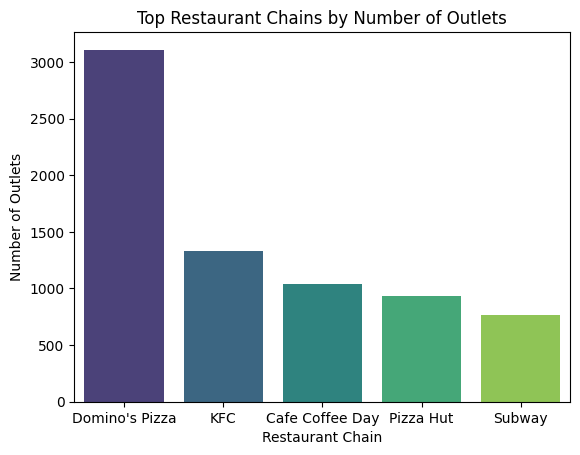

name
Cafe Coffee Day    2.933942
Domino's Pizza     3.716216
KFC                3.912246
Pizza Hut          3.726389
Subway             3.742950
Name: aggregate_rating, dtype: float64


In [19]:
#  Identify and visualize the top restaurant chains based on the number of outlets.
top_chains = df['name'].value_counts().head(5)
print(top_chains)
sns.barplot(x=top_chains.index, y=top_chains.values, palette='viridis')
plt.xlabel('Restaurant Chain')
plt.ylabel('Number of Outlets')
plt.title('Top Restaurant Chains by Number of Outlets')
plt.show()
#  Explore the ratings of these top chains.
top_chain_ratings = df[df['name'].isin(top_chains.index)].groupby('name')['aggregate_rating'].mean()
print(top_chain_ratings)


**Restaurant Features:**

In [20]:
df.columns

Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'zipcode', 'country_id',
       'locality_verbose', 'cuisines', 'timings', 'average_cost_for_two',
       'price_range', 'currency', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway', 'num_cuisines'],
      dtype='object')

/tmp/ipython-input-3563729148.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette='Set2')


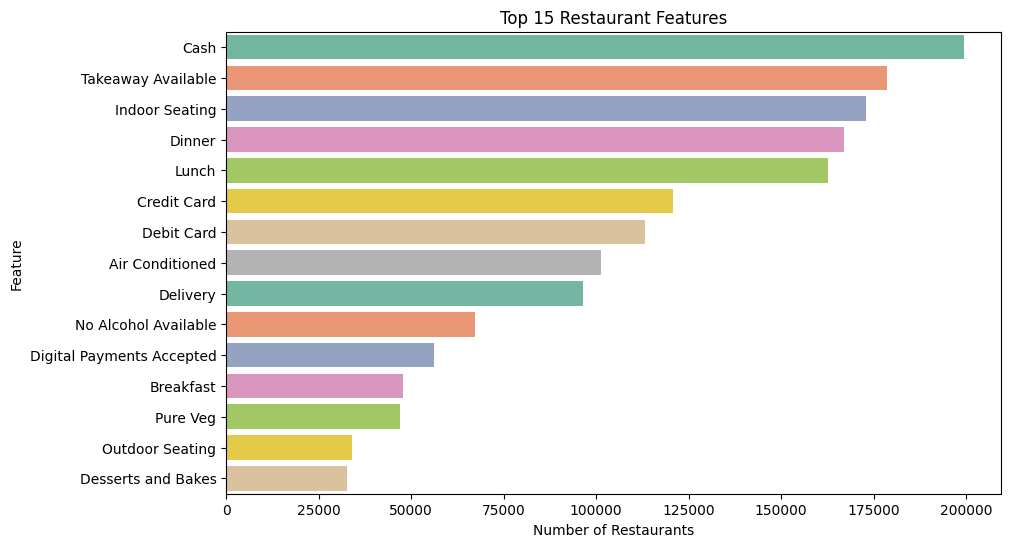

<Figure size 1200x600 with 0 Axes>

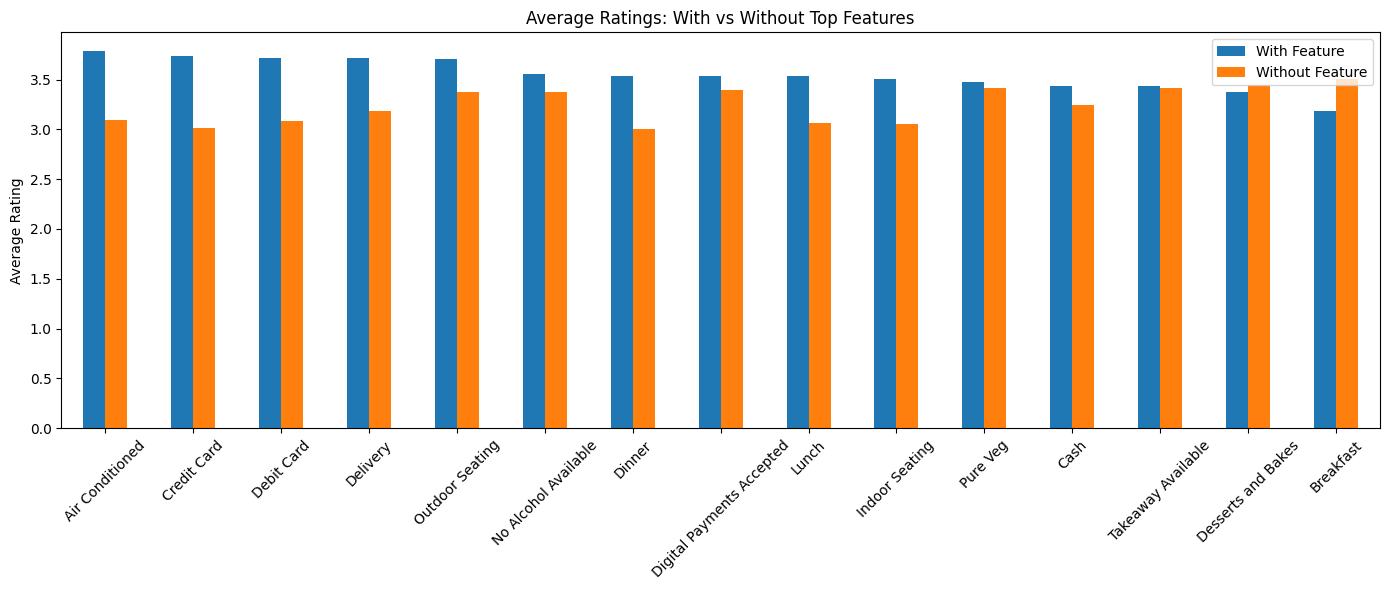

In [21]:
#  Analyze the distribution of restaurants based on features like Wi-Fi, Alcohol availability, etc.
# Convert highlights column to actual Python lists
import ast
df['highlights_list'] = df['highlights'].apply(ast.literal_eval)

# Flatten and count all features
from collections import Counter
feature_counter = Counter([feature for sublist in df['highlights_list'] for feature in sublist])

# Top 15 features
top_features = pd.Series(feature_counter).sort_values(ascending=False).head(15)

# Visualize top features
plt.figure(figsize=(10,6))
sns.barplot(x=top_features.values, y=top_features.index, palette='Set2')
plt.title("Top 15 Restaurant Features")
plt.xlabel("Number of Restaurants")
plt.ylabel("Feature")
plt.show()

# Correlation of features with average rating
feature_rating_comparison = {}

for feature in top_features.index:
    with_feature = df[df['highlights_list'].apply(lambda x: feature in x)]['aggregate_rating']
    without_feature = df[df['highlights_list'].apply(lambda x: feature not in x)]['aggregate_rating']
    feature_rating_comparison[feature] = {
        'With Feature': with_feature.mean(),
        'Without Feature': without_feature.mean()
    }

# Create DataFrame
rating_df = pd.DataFrame(feature_rating_comparison).T
rating_df = rating_df.sort_values(by='With Feature', ascending=False)

# Plot comparison
plt.figure(figsize=(12, 6))
rating_df.plot(kind='bar', figsize=(14, 6))
plt.title("Average Ratings: With vs Without Top Features")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 **Word Cloud for Reviews:**

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


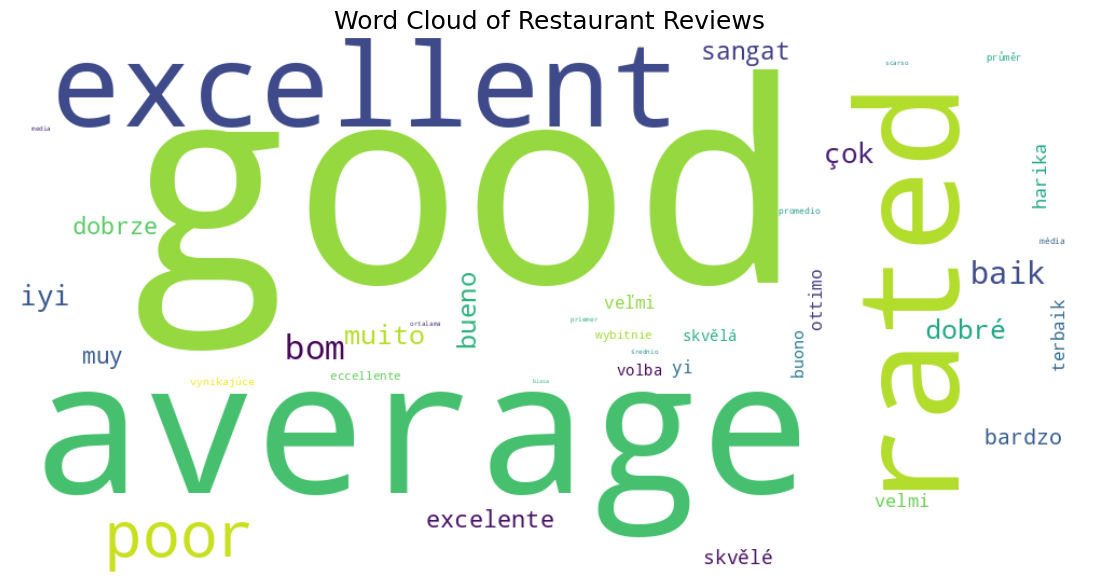

In [22]:
#  Create a word cloud based on customer reviews to identify common positive and negative sentiments.
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')

# Example column name: replace with actual review column
review_column = 'rating_text'  # Replace this if you have actual review text

# Combine all reviews into one text
text_data = ' '.join(df[review_column].dropna().astype(str).tolist()).lower()

# Clean the text
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=1000, height=500, background_color='white',
                      stopwords=stopwords, collocations=False).generate(text_data)

# Show the word cloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Restaurant Reviews", fontsize=18)
plt.show()